# Лабораторная работа №1 (Laboratory work 1)
### Исследование красного вина (Red Wine Research)

--------------------------------------
### Эпилог (Epilogue):
#### Набор данных относится к красному варианту португальского вина Vinho Verde. Из-за конфиденциальности и логистических проблем доступны только физико-химические (входные данные) и "качество" вина. Также учитываем, что нет дополнительных данных, т.е. о сортах винограда, марке вина, отпускной цене вина и т.д. (The dataset refers to the red variant of the Portuguese wine Vinho Verde. Due to confidentiality and logistical issues, only the physico-chemical (input data) and "quality" of the wine are available. We also take into consideration that there is no additional data, i.e. about grape varieties, wine brand, selling price of wine, etc.)
### Цель (Goal):
#### Данные не стандартизированы, не сбалансированы. Нужно научиться классифицировать данные, используя метод опорных векторов, и сравнить с классификацией, используя деревья принятия решений, сделать вывод о лучшей классификации. (The data is not standardized, not balanced. You need to learn how to classify data using the support vector machine method, and compare it with the classification using decision trees, to make a conclusion about the best classification.)

--------------------------------------
## Задание 1-2 (Task 1-2)
#### Загрузка и анализ исходных данных (Downloading and analyzing input data)

In [6]:
import pandas as pd

df = pd.read_csv('vine.dat', header=None)
df.columns =['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol', 'Class']
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Вывод о данных (Data conclusion):
#### В предоставленном наборе данных можно видеть Fixed Acidity (Фиксированная кислотность), Volatile Acidity (Содержание летучих кислот), Citric Acid (Лимонная кислота), Residual Sugar (Остаточный сахар), Chlorides (Хлориды), Free Sulfur Dioxide (Свободный диоксид серы), Total Sulfur Dioxide (Общий диоксид серы), Density (Плотность), PH (Водородный показатель), Sulphates (Сульфаты), Alcohol (Спирт). Class = "Качество вина" ("Wine quality").

--------------------------------------
## Задание 3 (Task 3)
#### Стандартизация (Standardization)

In [7]:
from sklearn import preprocessing
import numpy as np

In [8]:
Columns = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']

In [9]:
scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df[Columns])
df[Columns] = x
df.dropna()
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


### Вывод (conclusion):
#### Данные стандартизированы и очищены от нулевых значений. (The data is standardized and cleared of zero values.)

--------------------------------------
## Задание 4 (Task 4)
### Разделяем полученный датафрейм две выборки: обучающую* и тестовую выборки в соотношении 7 к 3 соответственно. (We divide the resulting dataframe into two samples: training* and test samples in a ratio of 7 to 3, respectively.)
##### *Валидационная выборка входит в обучающую и составляет 2 части из всех 10. В данном случае используем ее для вывода по наилучшей классификации между методами. (The validation sample is included in the training and consists of 2 parts out of all 10. In this case, we use it to infer the best classification between the methods.)

In [10]:
col = ['index'] + Columns + ['Class']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
y = df['Class']
train_table, test_table = train_test_split(df, train_size = 0.7)
train_class, test_class = train_test_split(y, train_size = 0.7)

train_table = train_table.reset_index()
test_table = test_table.reset_index()
train_class = train_class
test_class = test_class

df_test_table = pd.DataFrame(test_table, columns = col)
df_train_table = pd.DataFrame(train_table, columns = col)

print('train_table:')
df_train_table

train_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,331,1.080326,-0.937525,1.894957,0.256260,0.733965,-0.561823,-0.166270,0.664277,-0.525555,0.010924,1.949639,6
1,458,1.195232,-1.105120,1.843607,0.185312,-0.073677,-1.039977,-0.744040,1.618302,-0.331177,0.483029,0.729364,7
2,1593,-0.873078,0.514959,-0.980669,-0.453218,-0.413736,1.159531,-0.257497,-0.125443,0.705508,0.955133,-0.866379,6
3,707,-0.528360,-0.211283,-0.415813,0.327207,-0.222453,0.011961,-0.287906,-0.077742,0.381544,-0.874272,0.072294,5
4,657,2.114480,-0.155419,1.638205,-0.807957,-0.307468,0.681377,-0.135861,0.664277,-2.534131,0.128950,0.072294,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,1128,0.965420,-0.546472,0.303093,0.114364,0.160114,1.159531,1.293361,0.876283,-0.590348,0.128950,-0.397043,5
1115,1121,-0.987984,-0.155419,-1.391472,-0.524166,-0.541259,0.490115,-0.561586,-1.710184,0.835093,-0.638220,1.761904,6
1116,943,0.850513,-0.155419,0.354443,-0.169427,0.138860,-0.561823,-0.044634,1.003486,-0.460762,-0.343154,-0.678644,7
1117,1516,-1.275249,-1.160984,-0.107711,-0.169427,-0.349975,0.681377,0.350683,-0.220846,0.705508,1.840330,0.166161,5


In [13]:
print('test_table:')
df_test_table

test_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,125,0.390889,0.514959,-1.186070,-0.453218,1.244054,1.063900,1.323769,0.876283,-0.979104,0.246977,-0.960246,5
1,840,1.597403,-0.602337,1.021999,0.078890,-0.052423,-0.657454,-0.379133,0.325068,-0.460762,0.660068,1.574170,7
2,973,0.103624,-1.049255,0.867948,-0.595114,-0.179946,-0.944346,-1.048130,-0.369250,1.353436,-0.166115,0.260028,5
3,217,-0.126188,1.101539,-0.261762,-0.240375,-0.328722,-0.466193,-0.166270,-0.024741,0.316751,-0.638220,-1.241848,5
4,711,0.333436,0.207702,0.354443,0.327207,0.117607,0.011961,1.992767,1.618302,0.446337,-0.284141,-0.866379,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1103,-0.528360,-0.211283,-0.005010,-0.311323,-0.349975,-0.179300,-0.652813,-1.519379,0.251958,-0.166115,1.480302,6
476,1583,-1.217796,-0.378878,0.097691,-0.311323,-0.286214,1.542054,1.567041,-0.512353,0.122373,-0.225128,-0.584777,5
477,1448,-0.815625,0.291499,-1.340122,-0.453218,-0.158692,2.307100,0.229047,0.044161,0.575922,0.424016,-0.678644,5
478,247,-0.068735,0.403229,-0.518514,-0.169427,-0.328722,-0.466193,0.806817,-0.236746,-0.719933,-1.228350,-1.054113,5


### Вывод (Conclusion):
#### Получаем 4 выборки в датафреймах: 2 выборки с признаками и классами (тестовую и обучающую) и 2 выборки только с классами (тестовую и обучающую). (We get 4 samples in dataframes: 2 samples with attributes and classes (test and training) and 2 samples with classes only (test and training).)

-------
## Задание 5 (Task 5)
#### Деревья решений (The Decision Trees method)

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [15]:
def MakingTree(crit, alpha):
    clf = tree.DecisionTreeClassifier(criterion = crit, ccp_alpha = alpha)
    clf.fit(train_table[Columns], train_table[['Class']])
    

    tree.plot_tree(clf,filled = True, rounded = True)
    plt.savefig('tree.pdf') ##для сохранение в пдф
    plt.show
    
    # Классифицируем тестовую выборку и находим процент совпадения
    print("Score = ", clf.score(test_table[Columns], test_table[['Class']]))
    
    res = clf.predict(test_table[Columns])
    print("Accuracy = ", accuracy_score(test_class, res))
    print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
    print("Recall = ", recall_score(test_class, res, average='macro'))

## По коэффициенту Джинни (By Gini coefficient)

Score =  0.6041666666666666
Accuracy =  0.3854166666666667
Precision =  0.6558742808777377
Recall =  0.1648349045430859


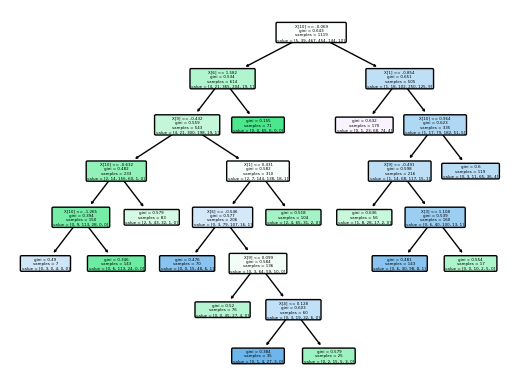

In [16]:
MakingTree('gini', 0.005)

Score =  0.5729166666666666
Accuracy =  0.4125
Precision =  0.6671065814621168
Recall =  0.17579433381934684


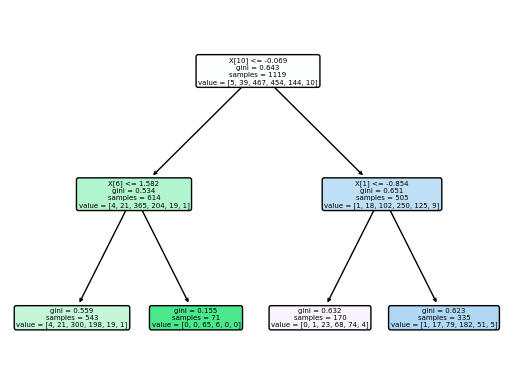

In [17]:
MakingTree('gini', 0.01)

Score =  0.5770833333333333
Accuracy =  0.45208333333333334
Precision =  0.8176052765093861
Recall =  0.18097643097643099
Выбираем!


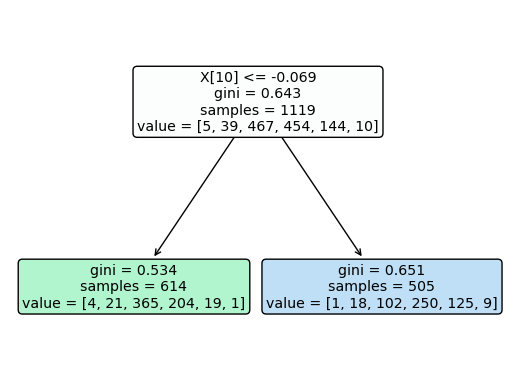

In [18]:
MakingTree('gini', 0.013)
print("Выбираем!")

Score =  0.5770833333333333
Accuracy =  0.45208333333333334
Precision =  0.8176052765093861
Recall =  0.18097643097643099


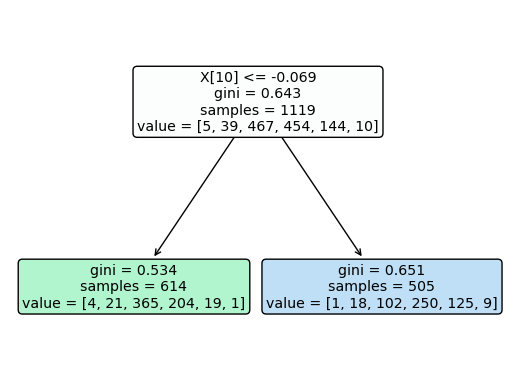

In [19]:
MakingTree('gini', 0.02)

Score =  0.5770833333333333
Accuracy =  0.45208333333333334
Precision =  0.8176052765093861
Recall =  0.18097643097643099


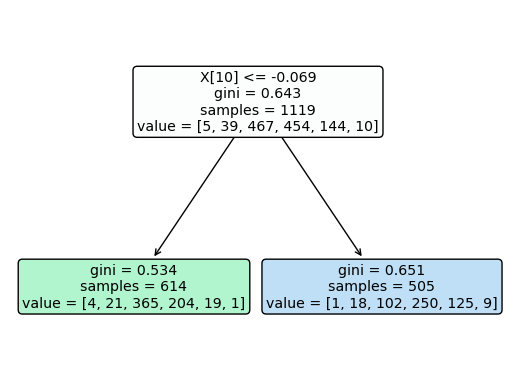

In [20]:
MakingTree('gini', 0.03)

Score =  0.44583333333333336
Accuracy =  0.4125
Precision =  0.9020833333333332
Recall =  0.16666666666666666


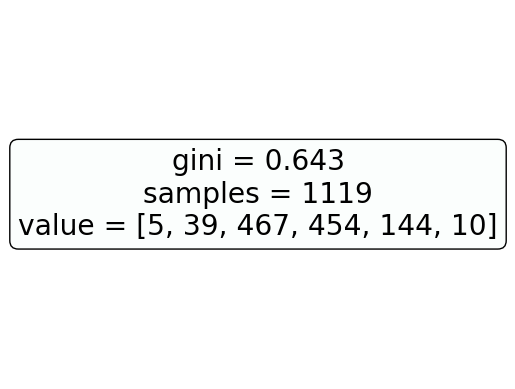

In [21]:
MakingTree('gini', 0.2)

Score =  0.44583333333333336
Accuracy =  0.4125
Precision =  0.9020833333333332
Recall =  0.16666666666666666


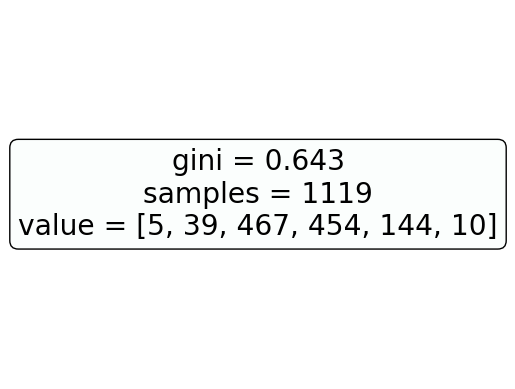

In [22]:
MakingTree('gini', 0.8)

## По энтропии (By entropy)

Score =  0.5895833333333333
Accuracy =  0.40625
Precision =  0.5170360050698519
Recall =  0.18672508698238244


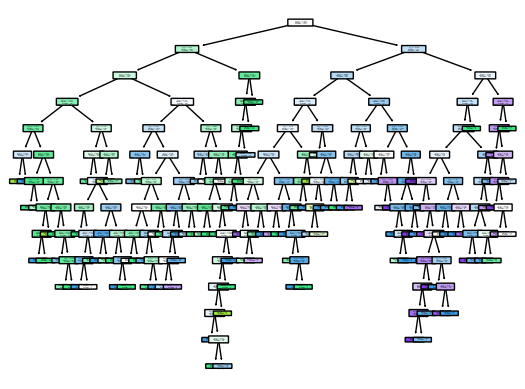

In [23]:
MakingTree('entropy', 0.005)

Score =  0.6166666666666667
Accuracy =  0.4083333333333333
Precision =  0.6732630272952854
Recall =  0.18235639353409025


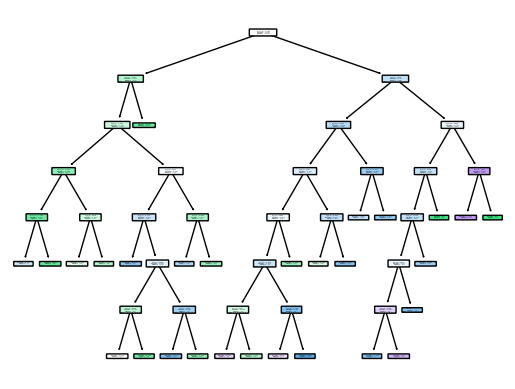

In [24]:
MakingTree('entropy', 0.01)

Score =  0.6125
Accuracy =  0.44166666666666665
Precision =  0.6784357617690951
Recall =  0.18263098239648523


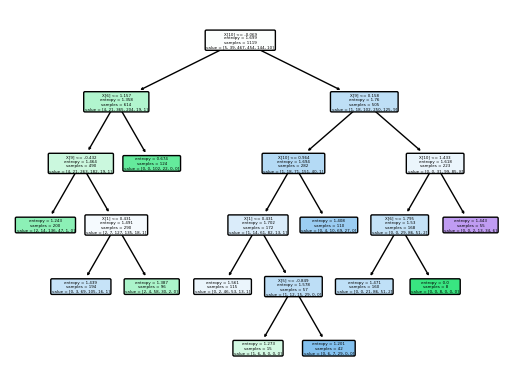

In [25]:
MakingTree('entropy', 0.015)

Score =  0.58125
Accuracy =  0.4395833333333333
Precision =  0.6786965811965812
Recall =  0.18153920655223413


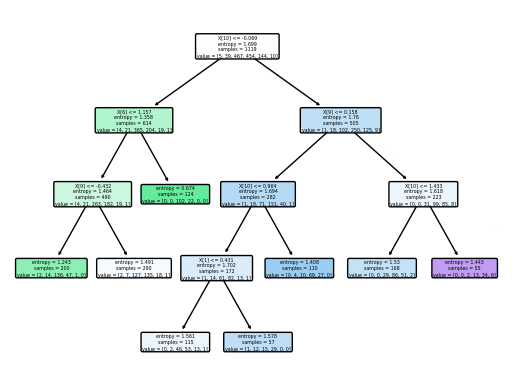

In [26]:
MakingTree('entropy', 0.02)

Score =  0.575
Accuracy =  0.44375
Precision =  0.816060606060606
Recall =  0.17689268926892687


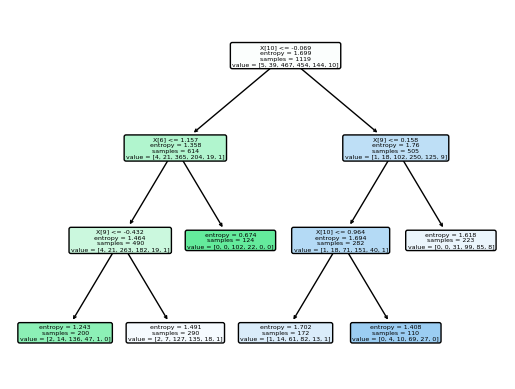

In [27]:
MakingTree('entropy', 0.025)

Score =  0.575
Accuracy =  0.44375
Precision =  0.816060606060606
Recall =  0.17689268926892687


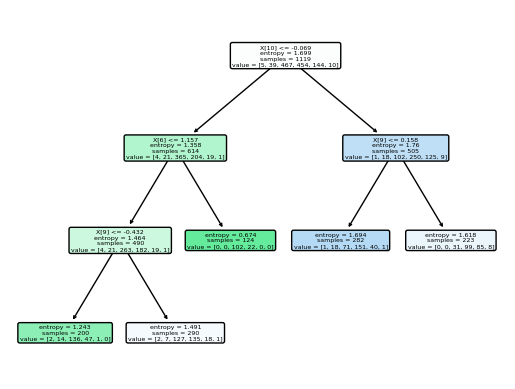

In [28]:
MakingTree('entropy', 0.03)

Score =  0.5770833333333333
Accuracy =  0.45208333333333334
Precision =  0.8176052765093861
Recall =  0.18097643097643099


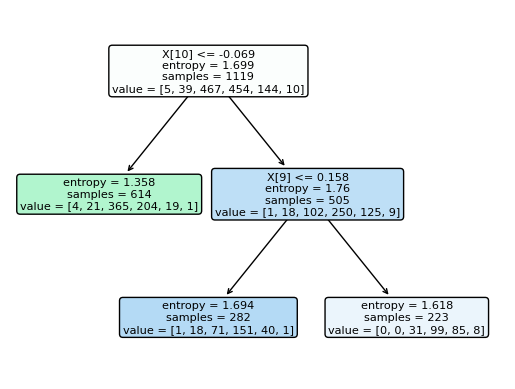

In [29]:
MakingTree('entropy', 0.035)

Score =  0.5770833333333333
Accuracy =  0.45208333333333334
Precision =  0.8176052765093861
Recall =  0.18097643097643099
Выбираем!


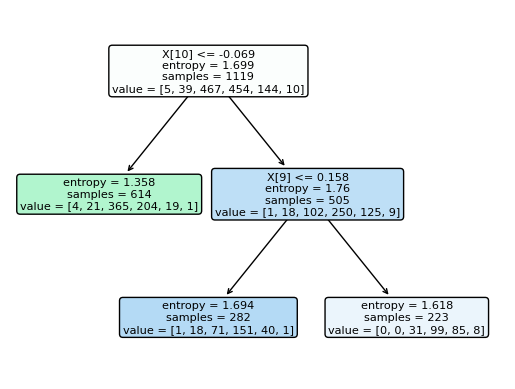

In [30]:
MakingTree('entropy', 0.037)
print("Выбираем!")

Score =  0.44583333333333336
Accuracy =  0.4125
Precision =  0.9020833333333332
Recall =  0.16666666666666666


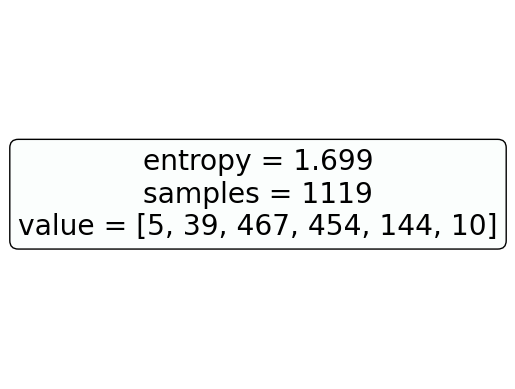

In [31]:
MakingTree('entropy', 0.2)

Score =  0.44583333333333336
Accuracy =  0.4125
Precision =  0.9020833333333332
Recall =  0.16666666666666666


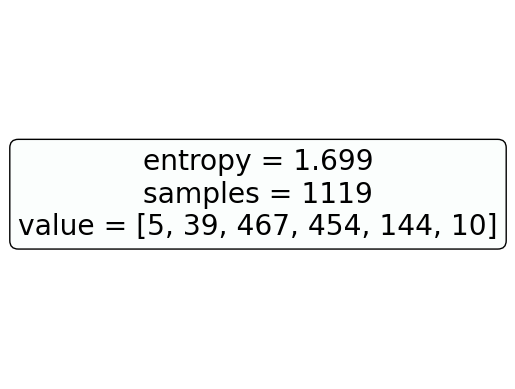

In [32]:
MakingTree('entropy', 0.8)

#### Для энтропии наилучшим дерево является при альфа = 0.037 с 55% со следующими параметрами эффективности: (For entropy, the best tree is at alpha = 0.037 with 55% with the following efficiency parameters:) 
##### Accuracy =  0.4313
##### Precision =  0.8108
##### Recall =  0.1747

#### Для коэффициента Джинни наилучшим дерево является при альфа = 0.013 с 53,96% со следующими параметрами эффективности: (For the Ginny coefficient, the best tree is at alpha = 0.013 with 53.96% with the following efficiency parameters:)
##### Accuracy =  0.4417
##### Precision =  0.8141
##### Recall =  0.1786

--------------
# Задание 6 (Task 6)
#### SVM-классификатор (SVM Classifier)

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [25]:
gammas = ['scale', 'auto', 1, 10, 0.1, 20, 0.01]
coef0s = [0, 1, 2, 5, 10, 0.1, 0.01]
degrees = [2, 3, 4, 5]
Cs = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

In [ ]:
#Не запускать!!!
from sklearn import svm


for krl in ['linear', 'poly', 'rbf', 'sigmoid']:
    best = [0]
    for gamma in gammas:
        for coef0 in coef0s:
            for degree in degrees:
                for C in Cs:
                    clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                            degree = degree, C = C)
                    clf.fit(train_table[Columns], 
                            train_table['Class'])
                    res = clf.predict(test_table[Columns])
                    score = clf.score(test_table[Columns],
                                      test_table[['Class']])
                    if score > best[0]:
                        best = [score, gamma, coef0, degree, C]
                        
    print(krl, best)

In [26]:
krl ='linear'
best = [0]
for gamma in gammas:
    for coef0 in coef0s:
        for degree in degrees:
            for C in Cs:
                clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                              degree = degree, C = C)
                clf.fit(train_table[Columns], 
                        train_table['Class'])
                res = clf.predict(test_table[Columns])
                score = clf.score(test_table[Columns],
                                  test_table[['Class']])
                if score > best[0]:
                    best = [score, gamma, coef0, degree, C]
                        
print(krl, best)
clf = svm.SVC(kernel = krl, gamma = best[1], coef0 = best[2], degree = best[3], C = best[4])
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

linear [0.5979166666666667, 'scale', 0, 2, 10]
Accuracy =  0.36875
Precision =  0.6231790166690012
Recall =  0.15128566396618529


In [27]:
krl ='sigmoid'
best = [0]
for gamma in gammas:
    for coef0 in coef0s:
        for degree in degrees:
            for C in Cs:
                clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                              degree = degree, C = C)
                clf.fit(train_table[Columns], 
                        train_table['Class'])
                res = clf.predict(test_table[Columns])
                score = clf.score(test_table[Columns],
                                  test_table[['Class']])
                if score > best[0]:
                    best = [score, gamma, coef0, degree, C]
                        
print(krl, best)
clf = svm.SVC(kernel = krl, gamma = best[1], coef0 = best[2], degree = best[3], C = best[4])
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

sigmoid [0.59375, 0.01, 0, 2, 2]
Accuracy =  0.36875
Precision =  0.6224631103663362
Recall =  0.15079795160809603


In [28]:
print(confusion_matrix(test_class, res))

[[  0   0   2   0   0   0]
 [  0   0  12   6   0   0]
 [  0   1 106 114   0   0]
 [  0   0  96  71   0   0]
 [  0   0  29  36   0   0]
 [  0   0   3   4   0   0]]


In [29]:
df['Class'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Наилучшие значения параметров (Best parameter values):
####    linear [0.5958333, 'scale', 0, 2, 0.01]:
######      Accuracy =  0.425
######      Precision =  0.527
######      Recall =  0.425
####    poly -
####    rbf -
####    sigmoid [0.5979166, 0.01, 0, 2, 2]
######      Accuracy =  0.4188
######      Precision =  0.5221
######      Recall =  0.4188

----------------------
# Задание 7 (Task 7)
#### Выбираем наилучшее (Choosing the best)
###### Тестовой становится валидационная выборка, составляющая 2 части из 7 всего (The validation sample, consisting of 2 parts out of 7 total, becomes a test sample)

In [134]:
from sklearn.model_selection import train_test_split


train_table, test_table = train_test_split(df_train_table, train_size = 5/7)
train_class, test_class = train_test_split(train_class, train_size = 5/7)

train_table = train_table.reset_index()
test_table = test_table.reset_index()

df_test_table = pd.DataFrame(test_table, columns = col)
df_train_table = pd.DataFrame(train_table, columns = col)

print('train_table:')
df_train_table

train_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,1540,-1.217796,-0.043689,-0.980669,1.320476,-0.349975,-0.466193,-0.439951,-0.151944,1.612607,-0.166115,1.104833,6
1,1272,-1.390155,-0.378878,-1.391472,-0.453218,-0.222453,0.872638,-0.075043,-1.535280,1.223850,-0.756246,0.729364,5
2,476,0.563248,-1.440308,0.713897,-0.382271,0.075099,-0.944346,-0.926494,0.664277,-0.201591,0.246977,-0.678644,5
3,245,-0.585813,0.738418,-1.391472,-0.382271,-0.073677,-0.944346,-0.713631,0.823281,1.936571,1.781317,-0.490910,6
4,1153,0.735607,-0.602337,0.405794,-0.311323,-0.094931,0.107592,-0.257497,-0.279147,-0.525555,0.010924,0.635497,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,462,1.539950,-1.496173,2.100359,0.007942,-0.052423,-0.561823,-0.652813,0.134264,-0.849519,-0.284141,1.292568,5
795,860,-0.643266,0.514959,-1.083370,0.114364,-0.222453,-0.083669,1.171725,0.378070,1.288643,-0.697233,-0.866379,5
796,795,1.425044,2.023307,0.149042,0.043416,0.946502,-0.848716,0.411500,0.590075,-2.080582,3.079604,-0.209308,5
797,1556,-0.987984,1.967442,-1.186070,-0.240375,-0.456244,-0.370562,-0.804858,-0.204945,1.418228,-0.579207,-0.490910,5


In [135]:
print('test_table:')
df_test_table

test_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,13,-0.298547,0.459094,0.097691,-0.666062,0.563935,-0.657454,-0.531178,0.346269,-0.331177,5.322101,-1.241848,5
1,1061,0.448342,-0.714066,1.176051,-0.524166,-0.349975,-0.848716,-0.926494,-1.127169,-0.655141,0.187963,1.949639,8
2,1125,0.275983,-1.607903,0.405794,-0.595114,-0.690035,-0.274931,-0.591995,-1.487578,-1.108690,-0.402167,0.823232,7
3,1103,-0.528360,-0.211283,-0.005010,-0.311323,-0.349975,-0.179300,-0.652813,-1.519379,0.251958,-0.166115,1.480302,6
4,682,0.103624,-0.378878,0.200392,-0.204901,-0.201199,1.542054,0.350683,0.664277,0.122373,-0.697233,-0.584777,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1139,-0.068735,-0.099554,-0.159061,-0.382271,-0.179946,0.011961,1.202134,0.473472,0.187166,-0.107102,-0.866379,6
316,1564,-0.643266,0.933944,-0.723916,-0.382271,-0.243707,-0.370562,-0.804858,-0.681958,-0.136798,-0.697233,-0.303175,5
317,1154,-0.987984,0.291499,-1.391472,-0.240375,0.266383,3.263407,0.502727,-0.692558,1.806985,0.128950,0.917099,6
318,428,0.448342,-0.043689,0.303093,-0.878905,-0.371229,-0.657454,-0.500769,0.558274,-0.460762,-0.343154,-1.054113,5


### Деревья принятия решений (Decision trees)
#### 1) По коэф. Джини (According to the Gini coef.)

0.565625
Accuracy =  0.390625
Precision =  0.7988646092094367
Recall =  0.16405759573132453


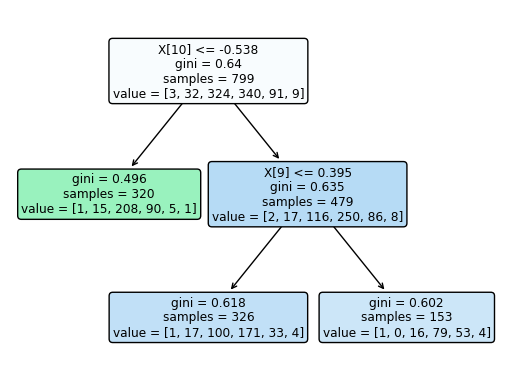

In [120]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.013)
clf.fit(train_table[Columns], train_table[['Class']])
    
tree.plot_tree(clf,filled = True, rounded = True)
plt.savefig('tree.pdf') ##для сохранение в пдф
plt.show
    
# Классифицируем тестовую выборку и находим процент совпадения
print(clf.score(test_table[Columns], test_table[['Class']]))
    
res = clf.predict(test_table[Columns])
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

#### 2) По энтропии (By entropy)

0.575
Accuracy =  0.4125
Precision =  0.8017488746549168
Recall =  0.16476381042059007


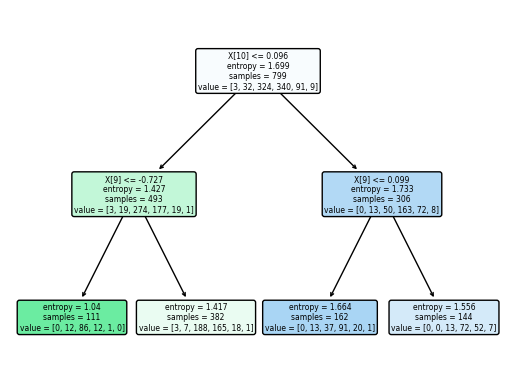

In [121]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.037) 
clf.fit(train_table[Columns], train_table[['Class']])
    
tree.plot_tree(clf,filled = True, rounded = True)
plt.savefig('tree.pdf') ##для сохранение в пдф
plt.show
    
# Классифицируем тестовую выборку и находим процент совпадения
print(clf.score(test_table[Columns], test_table[['Class']]))
    
res = clf.predict(test_table[Columns])
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

### SVM-классификаторы (SVM classifiers)

#### Линейный классификатор (Linear Classifier):

In [122]:
clf = svm.SVC(kernel = 'linear', gamma ='scale', coef0 = 0, degree = 2, C = 0.1)
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print(clf.score(test_table[Columns], test_table[['Class']]))    
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

0.621875
Accuracy =  0.396875
Precision =  0.800972712637147
Recall =  0.165097300690521


In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [123]:
print(confusion_matrix(test_class, res))
print(classification_report(test_class, res, zero_division=1))

[[ 0  0  2  0  0  0]
 [ 0  0  4  4  0  0]
 [ 0  0 56 88  0  0]
 [ 0  0 47 71  0  0]
 [ 0  0 19 24  0  0]
 [ 0  0  1  4  0  0]]
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00         8
           5       0.43      0.39      0.41       144
           6       0.37      0.60      0.46       118
           7       1.00      0.00      0.00        43
           8       1.00      0.00      0.00         5

    accuracy                           0.40       320
   macro avg       0.80      0.17      0.14       320
weighted avg       0.51      0.40      0.35       320



In [1]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

In [124]:
test_class = label_binarize(test_class, classes=[5, 6, 7, 4, 8, 3])
train_class = label_binarize(train_class, classes=[5, 6, 7, 4, 8, 3])
classifier = OneVsRestClassifier(clf)
y_score = classifier.fit(train_table[Columns], train_class).decision_function(test_table[Columns])

In [125]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(test_class[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    
fpr["micro"], tpr["micro"], _ = roc_curve(test_class.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("ROC-AUC(micro) = ", roc_auc["micro"], "ROC-AUC(macro) = ", (roc_auc[0] + roc_auc[1] + roc_auc[2] + roc_auc[3] + roc_auc[4] + roc_auc[5]) / 6)

ROC-AUC(micro) =  0.6244628906249999 ROC-AUC(macro) =  0.4443506972792357


#### Сигмоид-классификатор:

In [136]:
clf = svm.SVC(kernel = 'sigmoid', gamma = 0.01, coef0 = 0, degree = 2, C = 2)
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print(clf.score(test_table[Columns], test_table[['Class']]))    
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

0.55625
Accuracy =  0.40625
Precision =  0.8017494238424471
Recall =  0.1637561274509804


In [137]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_class, res))
from sklearn.metrics import classification_report
print(classification_report(test_class, res, zero_division=1))

[[ 0  0  1  2  0  0]
 [ 0  0 10  3  0  0]
 [ 0  0 72 64  0  0]
 [ 0  0 70 58  0  0]
 [ 0  0 16 20  0  0]
 [ 0  0  3  1  0  0]]
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         3
           4       1.00      0.00      0.00        13
           5       0.42      0.53      0.47       136
           6       0.39      0.45      0.42       128
           7       1.00      0.00      0.00        36
           8       1.00      0.00      0.00         4

    accuracy                           0.41       320
   macro avg       0.80      0.16      0.15       320
weighted avg       0.51      0.41      0.37       320



In [138]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc


test_class = label_binarize(test_class, classes=[5, 6, 7, 4, 3])
train_class = label_binarize(train_class, classes=[5, 6, 7, 4, 3])
classifier = OneVsRestClassifier(clf)
y_score = classifier.fit(train_table[Columns], train_class).decision_function(test_table[Columns])

In [139]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(test_class[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    
fpr["micro"], tpr["micro"], _ = roc_curve(test_class.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("ROC-AUC(micro) = ", roc_auc["micro"], "ROC-AUC(macro) = ", (roc_auc[0] + roc_auc[1] + roc_auc[2] + roc_auc[3] + roc_auc[4]) / 5)

ROC-AUC(micro) =  0.7363546965574352 ROC-AUC(macro) =  0.4979602854427704


### Таким образом, наилучшим классификатором оказался сигмоид(gamma = 0.01, coef0 = 0, degree = 2, C = 2) с процентом совпадения 58,44%